In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
# TODO: Ideálně upravit na výpočet LUFS

In [32]:
def Moovin_average_of_RMS(uploaded_file_name):   
    y, sr = librosa.load(uploaded_file_name)

    # STFT
    S, phase = librosa.magphase(librosa.stft(y))

    # rms calculation
    rms = librosa.feature.rms(S=S)
    seconds = 7.5

    # mooving averages calculation
    order = (sr/2048)*seconds # TODO: Upravit výpočet řádu na 1s nebo 0,5s dle sr
    order = round(order)
    print(sr,order)

    rms_ma = np.zeros((1,(rms.size)))
    for n in range(rms.size-order):
        for m in range(order):
            rms_ma[0,n] = rms_ma[0,n] + rms[0,(n+m)]
        if rms_ma[0,n] != 0:
            rms_ma[0,n] = rms_ma[0,n]/order
    return rms, rms_ma, S

In [33]:
def Print_graphs(rms,rms_ma,S):
    fig, ax = plt.subplots(3,1, figsize=(20,10))

    times = librosa.times_like(rms)

    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])
    ax[0].set(title='log Power spectrogram')

    ax[1].semilogy(times, rms[0], label='RMS Energy')
    ax[1].set(xticks=[])
    ax[1].legend()
    ax[1].label_outer()

    ax[2].semilogy(times, rms_ma[0], label='RMS mooving average Energy')
    ax[2].set(xticks=[])
    ax[2].legend()
    ax[2].label_outer()


In [34]:
def Rms_analyse(uploaded_file_name):
    rms, rms_ma, S = Moovin_average_of_RMS(uploaded_file_name=uploaded_file_name)
    Print_graphs(rms=rms, rms_ma=rms_ma, S=S)

22050 81


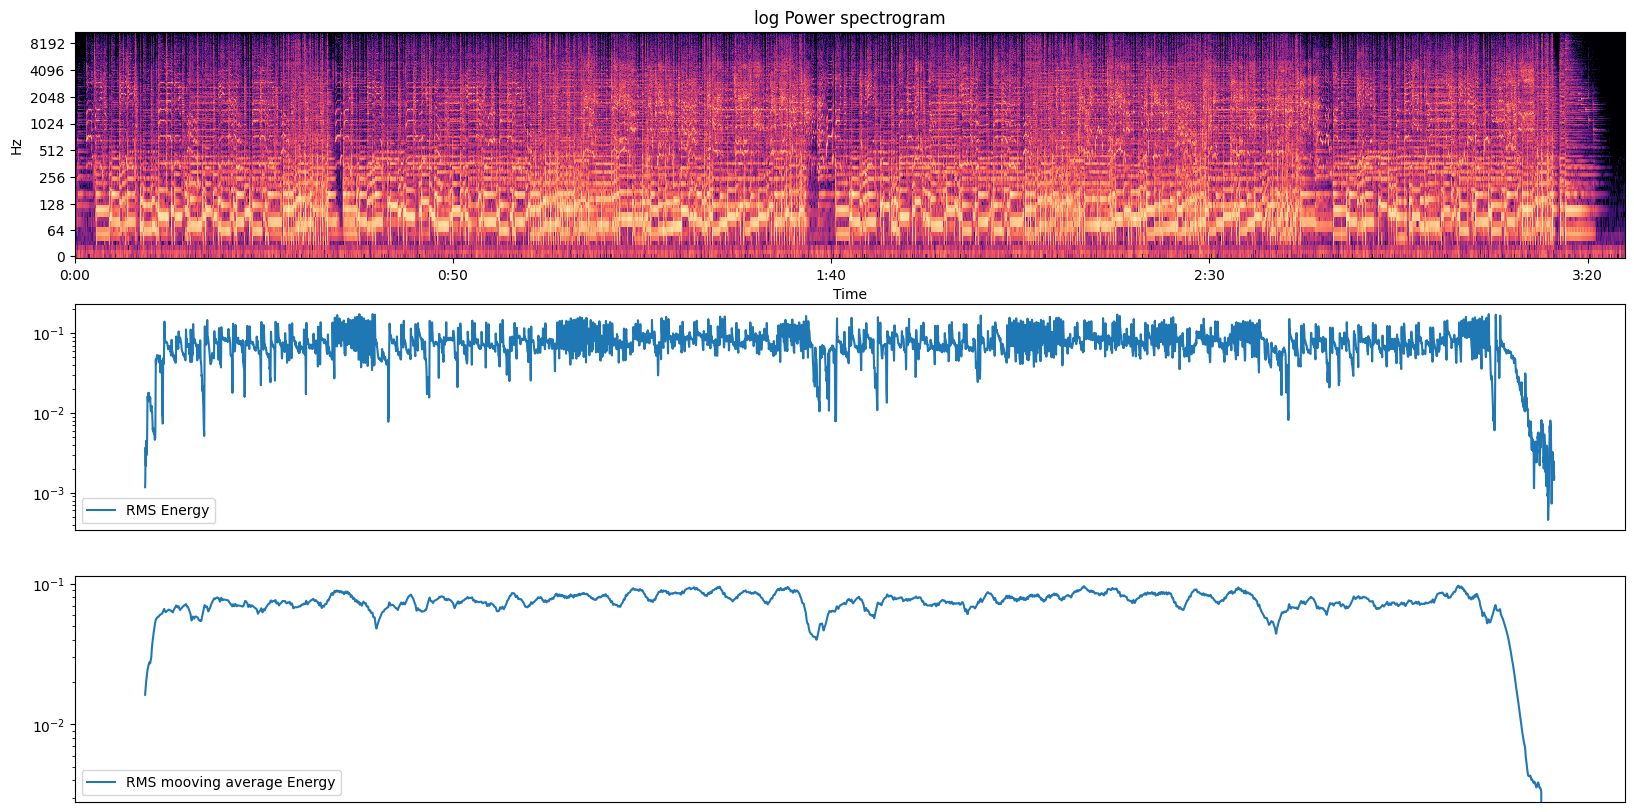

In [35]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/04.-Oh! Darling.wav"
Rms_analyse(uploaded_file_name)

22050 81


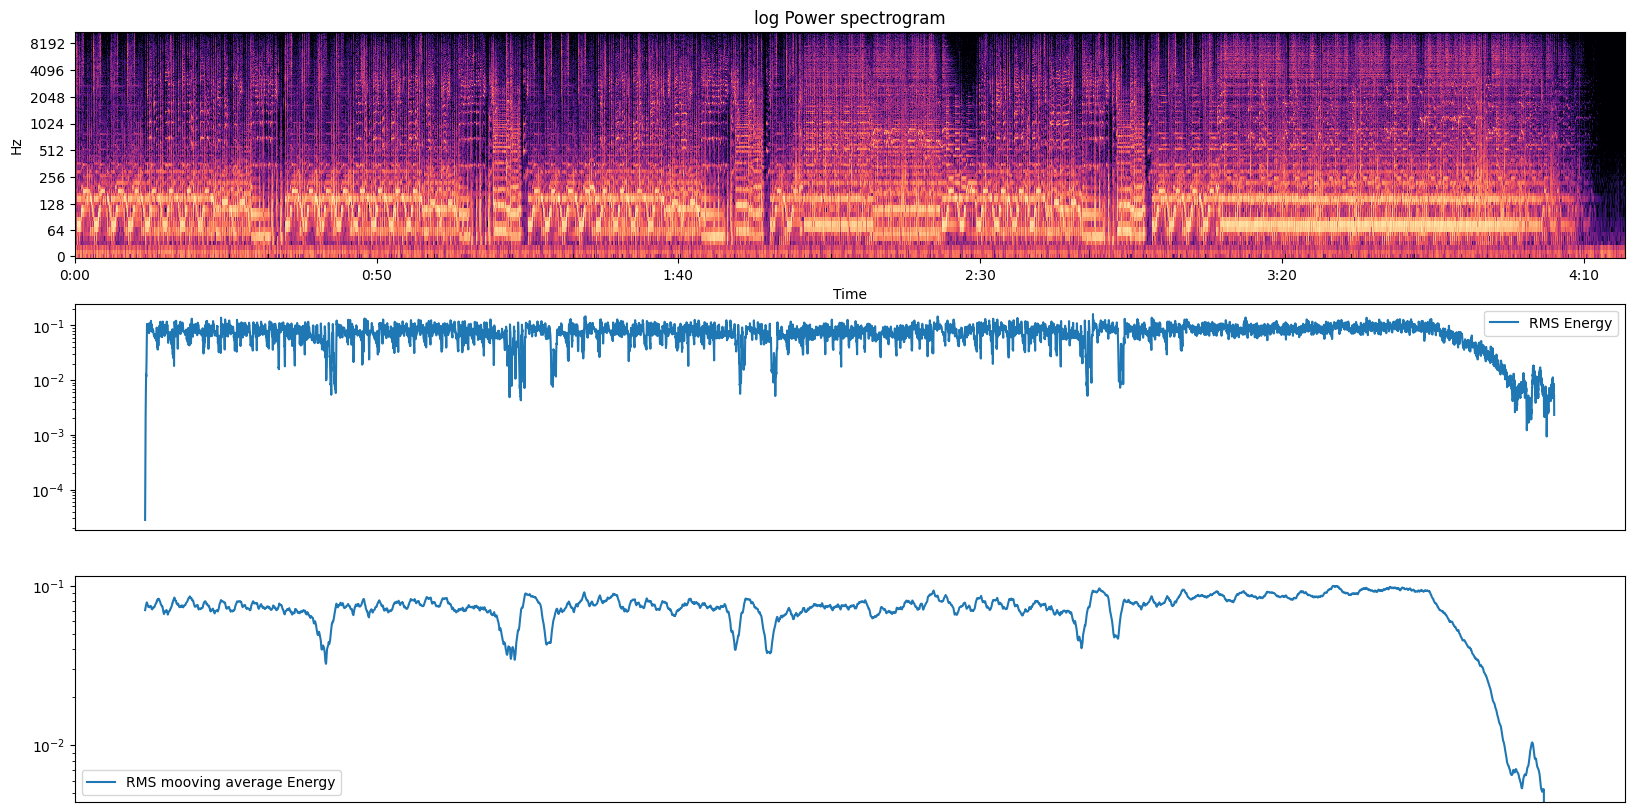

In [36]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/01.-Come Together.wav"
Rms_analyse(uploaded_file_name)

22050 81


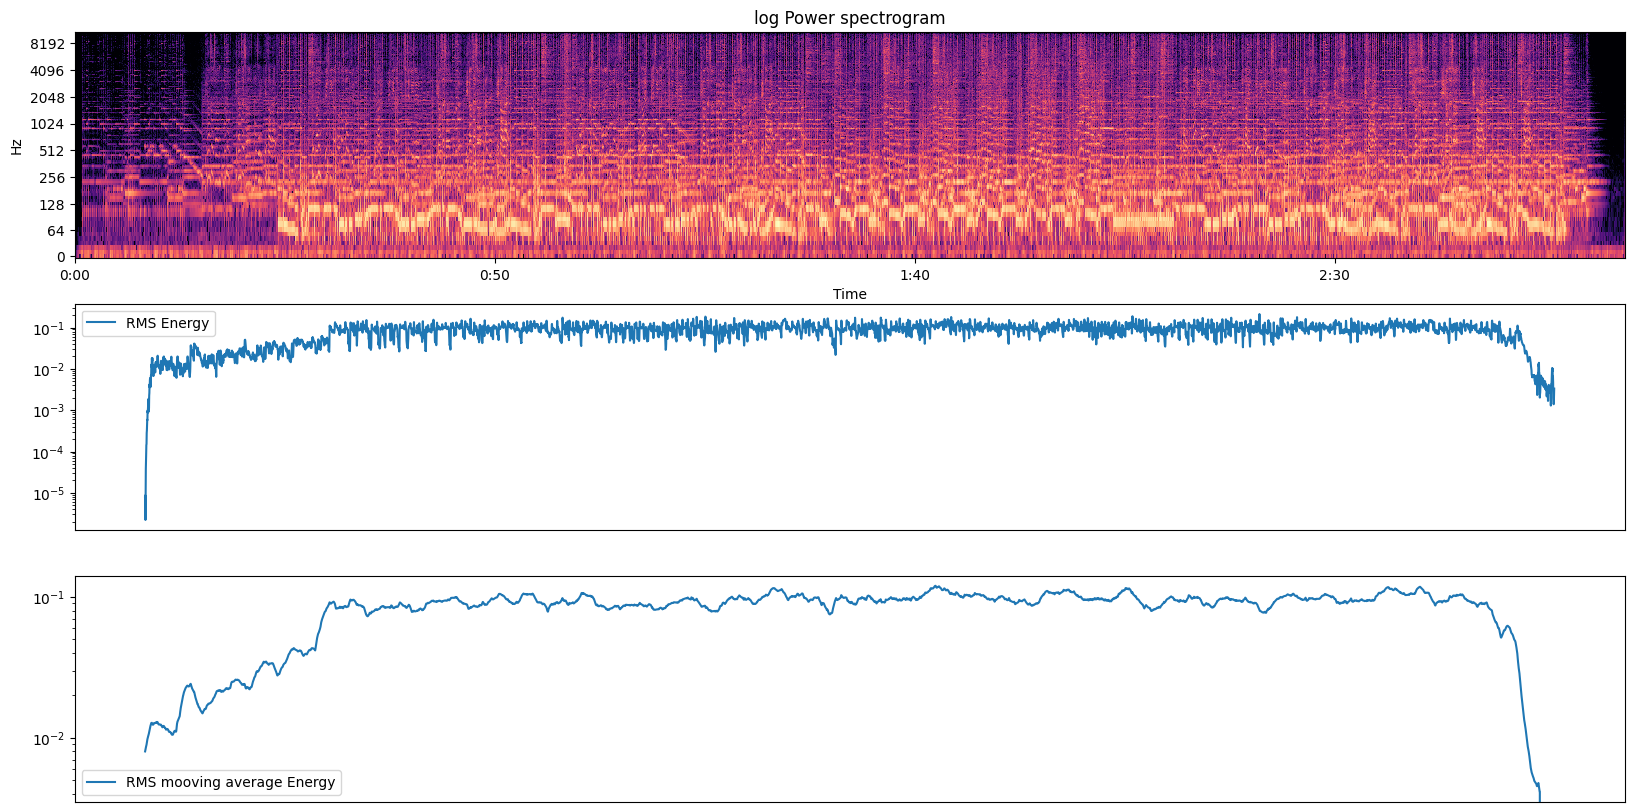

In [37]:
uploaded_file_name = "Referencni_skladby/The Beatles - Abbey Road (1969) (2012 180g Vinyl 24bit-96kHz) [FLAC] vtwin88cube/07.-Here Comes The Sun.wav"
Rms_analyse(uploaded_file_name)

22050 81


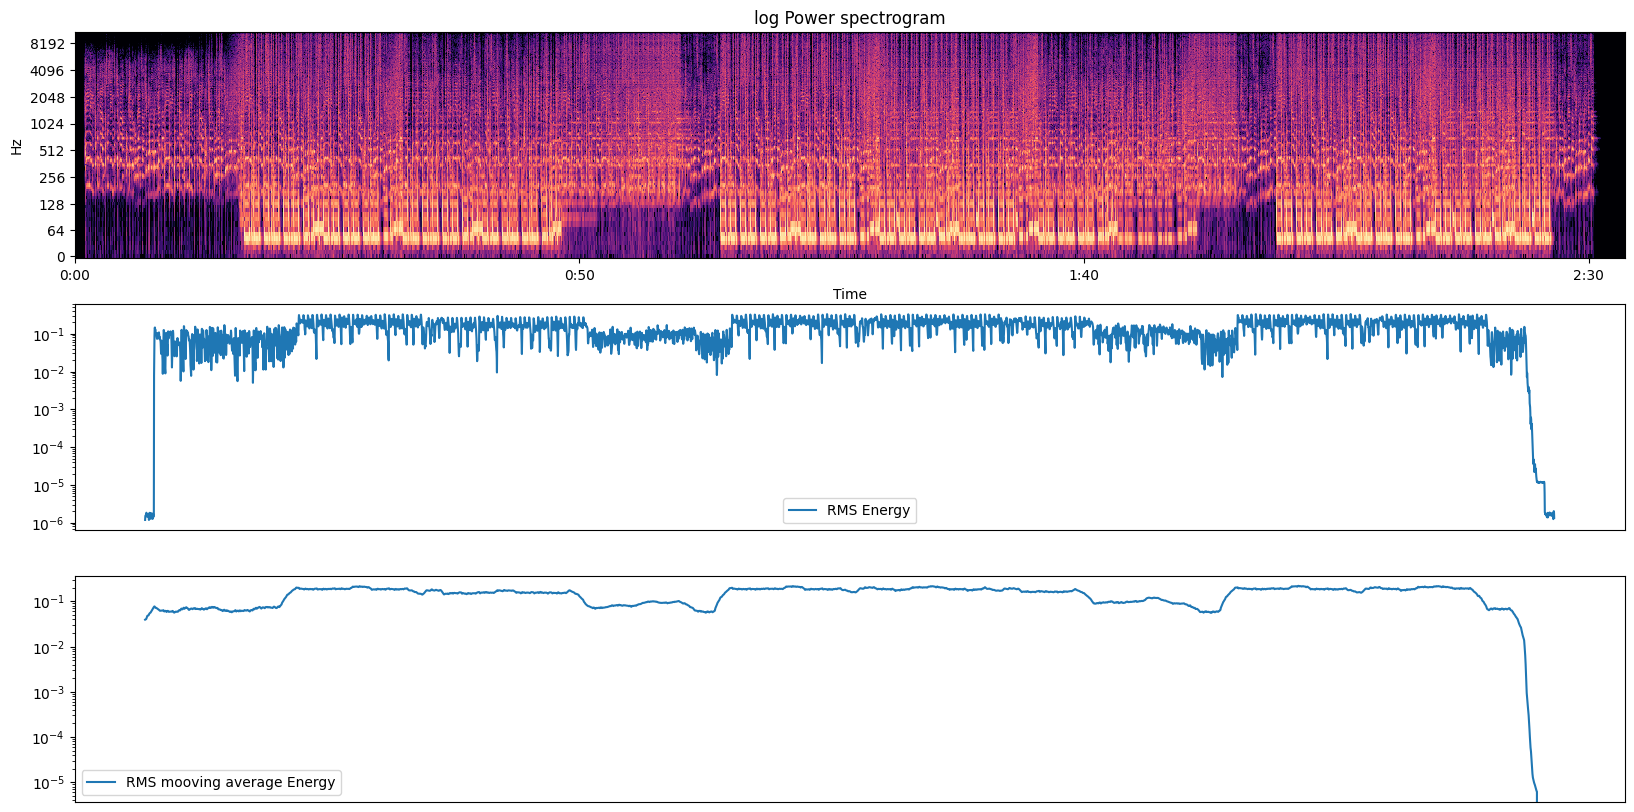

In [38]:
uploaded_file_name = "Referencni_skladby/Imanbek & BYOR - Belly Dancer (Official Music Video).wav"
Rms_analyse(uploaded_file_name)